In [40]:
import pandas as pd
import matplotlib.pyplot as mplot
import seaborn as sb
import numpy as np
import warnings

In [41]:
co2_data = pd.read_csv('CO2_per_year.csv')

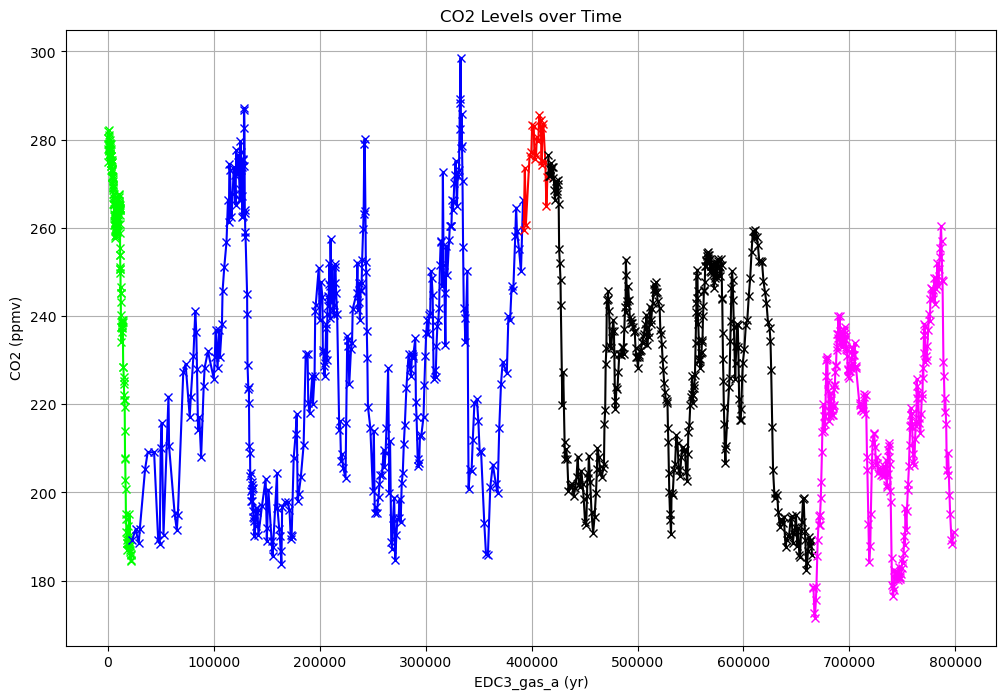

In [42]:
colors = {
    'Dome C (Monnin et al. 2001) measured at University of Bern': 'lime',
    'Vostok (Petit et al. 1999; Pepin et al. 2001; Raynaud et al. 2005) measured at LGGE in Grenoble': 'blue',
    'Dome C (Siegenthaler et al. 2005) measured at LGGE in Grenoble':'red',
    'Dome C (Siegenthaler et al. 2005)  measured at University of Bern':'black',
    'Dome C (Luethi et al. (sub)) measured at University of Bern':'fuchsia'
}

mplot.figure(figsize=(12, 8))
for source, color in colors.items():
    subset = co2_data[co2_data['source'] == source]
    mplot.plot(subset['EDC3_gas_a (yr)'], subset['CO2 (ppmv)'], marker='x', color=color)

mplot.xlabel('EDC3_gas_a (yr)')
mplot.ylabel('CO2 (ppmv)')
mplot.title('CO2 Levels over Time')
mplot.grid(True)
mplot.show()

In [43]:
temperature_data = pd.read_csv('temperature.csv')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


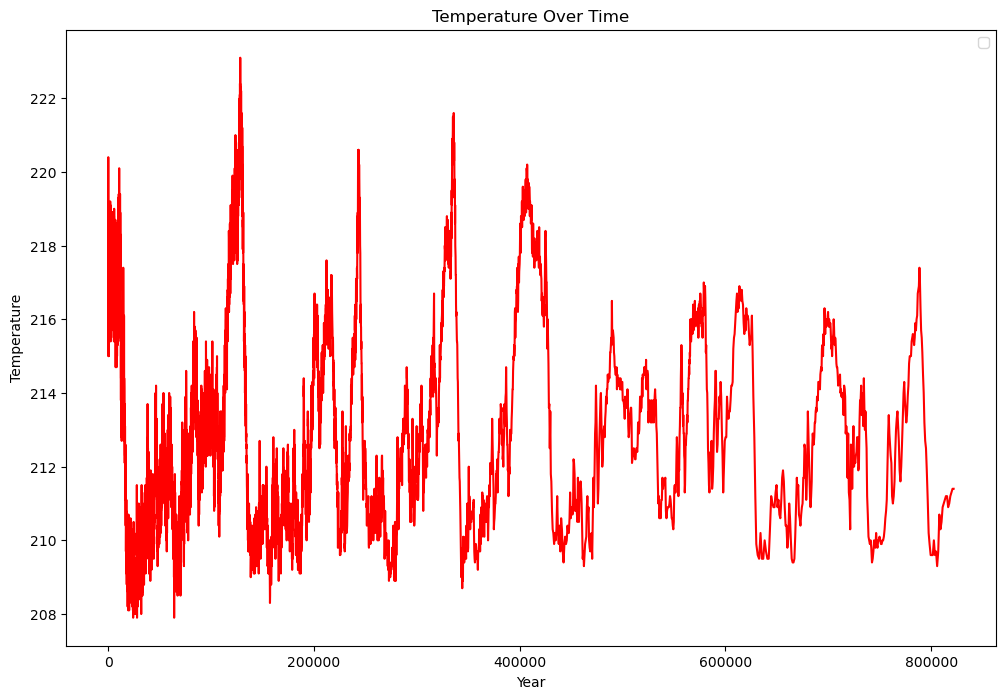

In [44]:
mplot.figure(figsize=(12, 8))

mplot.plot(temperature_data['AICC2012'], temperature_data['temp'], color='red')
mplot.xlabel('Year')
mplot.ylabel('Temperature')
mplot.title('Temperature Over Time')
mplot.legend()
mplot.show()

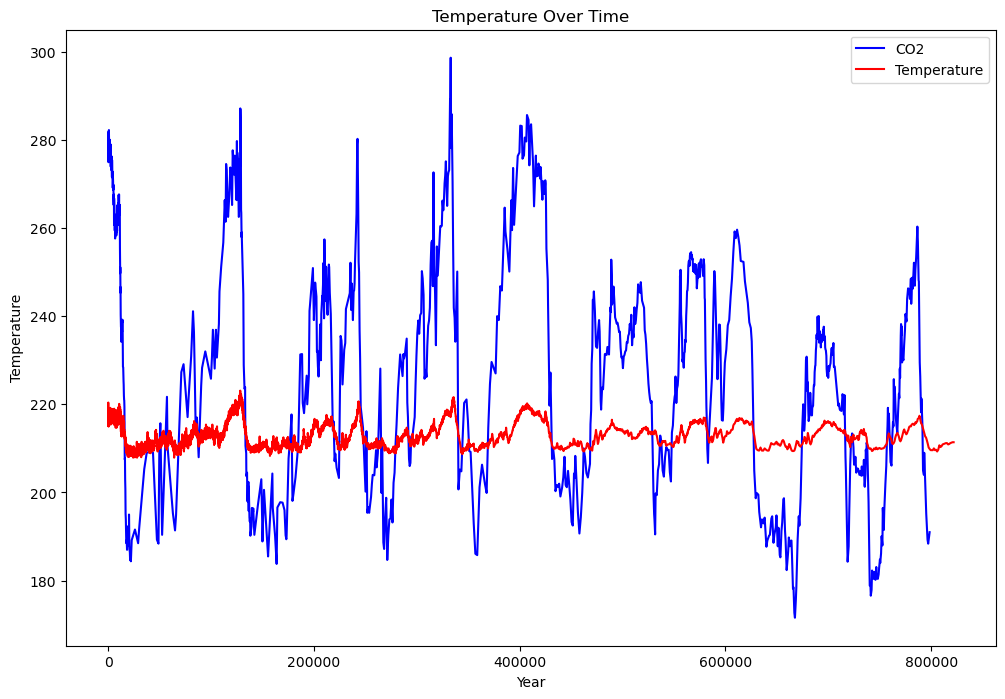

In [45]:
mplot.figure(figsize=(12, 8))

mplot.plot(co2_data['EDC3_gas_a (yr)'], co2_data['CO2 (ppmv)'], color='blue', label='CO2')

mplot.xlabel('EDC3_gas_a (yr)')
mplot.ylabel('CO2 (ppmv)')
mplot.title('CO2 Levels over Time')
mplot.plot(temperature_data['AICC2012'], temperature_data['temp'], color='red', label='Temperature')
mplot.xlabel('Year')
mplot.ylabel('Temperature')
mplot.title('Temperature Over Time')
mplot.legend()
mplot.show()

In [46]:
# irish data: https://www.met.ie/climate/available-data/long-term-data-sets/
birr_weather = pd.read_csv('irish_weather_data\Birr-Castle-second-order-station_1872-1911.csv')

belmullet_weather = pd.read_csv('irish_weather_data\Blacksod-Point_Belmullet_1872-1920.csv')



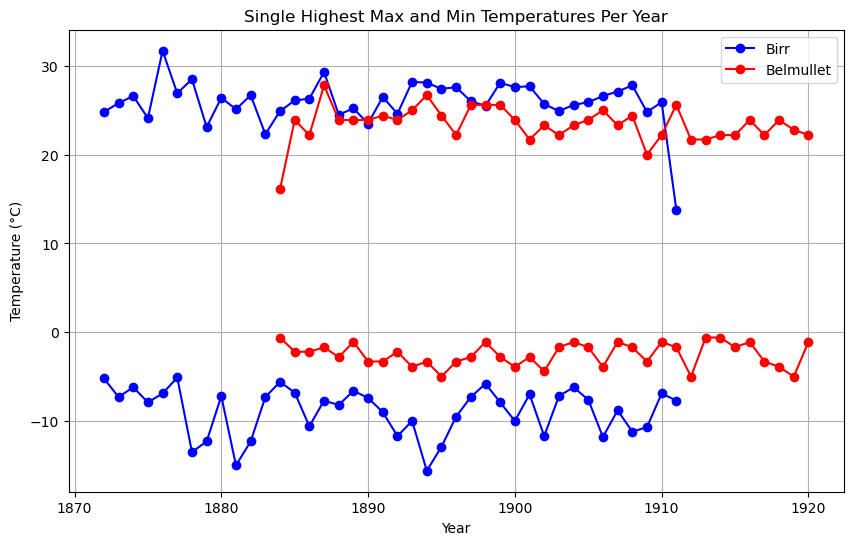

In [47]:
def plot_max_min_temperatures(df, location_name, color):
    max_per_year = df.groupby('Year')['Max (C)'].max()
    min_per_year = df.groupby('Year')['Min (C)'].min()

    # Create a DataFrame with the highest max and min per year
    df_max_min_per_year = pd.DataFrame({'Year': max_per_year.index, 'Max (C)': max_per_year.values, 'Min (C)': min_per_year.values})

    # Plotting
    mplot.plot(df_max_min_per_year['Year'], df_max_min_per_year['Max (C)'], label=f'{location_name}', marker='o', color=color)
    mplot.plot(df_max_min_per_year['Year'], df_max_min_per_year['Min (C)'], marker='o', color=color)


mplot.figure(figsize=(10, 6))

plot_max_min_temperatures(birr_weather, 'Birr', 'blue')
plot_max_min_temperatures(belmullet_weather, 'Belmullet', 'red')

mplot.legend()

mplot.title('Single Highest Max and Min Temperatures Per Year')
mplot.xlabel('Year')
mplot.ylabel('Temperature (°C)')
mplot.grid(True)
mplot.show()